In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import math
from functools import reduce

## Run the experiment

In [2]:
# N is the number of training points
def create_dataset(f, N):
    dataset = [];
    
    for _ in range(N):
        # Choose the inputs xn of the data set as random points
        x1, x2 = np.random.uniform(-1,1,2)
        
        # evaluate the target function on each xn to get the corresponding output yn.
        y = 1 if x2 > f(x1) else -1

        dataset.append([[x1, x2], y])
    
    return dataset;

def run_experiment(N):
    # Choose a random line in the plane as your target function f
    x1, y1 = np.random.uniform(-1,1,2)
    x2, y2 = np.random.uniform(-1,1,2)

    a = (y2 - y1)/(x2 - x1)

    b = random.uniform(-1, 1)

    def f(x):
        y = a*x + b
        return y
    
    # Create training dataset by selecting N random points, and evaluating f on them
    dataset = create_dataset(f, N)
        
    return (f, dataset)

## Visualization example of one experimentation

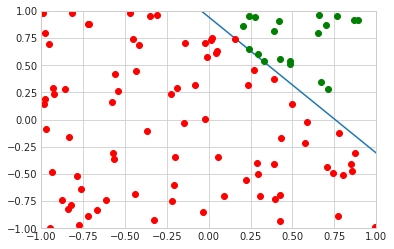

In [3]:
# f is our target function
# dataset is training dataset
f, dataset = run_experiment(100)

plt.axis([-1, 1, -1, 1])

x = np.linspace(-1, 1, 2)
plt.plot(x, f(x))

for data in dataset:
    point = data[0]
    output = data[1]
    plt.plot(point[0], point[1],  'go' if output > 0 else 'ro')

## Run the Perceptron Learning Algorithm

In [4]:
def is_misclassified_point(w, data):
    return (np.sign(np.dot(w, [1, data[0][0], data[0][1]])) != data[1])

In [6]:
def repeat_experiment(N)
    experiments = []
    
    # In order to get a reliable estimate for these two quantities, you should repeat the experiment for 1000 runs
    for _ in range(1000):
        f, dataset = experiment()

        #  Start the PLA with the weight vector w being all zeros
        w = [0,0,0]

        # consider sign(0) = 0, so all points are initially misclassified
        misclassified_points = dataset

        number_of_iterations = 0
        while len(misclassified_points) > 0:
            # Pick a random misclassified point
            data = random.sample(misclassified_points, 1)[0]

            # Apply PLA iteration
            w = w + np.dot(data[1], [1, data[0][0], data[0][1]])

            misclassified_points = list(filter(lambda data: is_misclassified_point(w, data), dataset))
            number_of_iterations += 1

        # Disagreement probability between g and f
        # approximate it by generating a sufficiently large, separate set of points to estimate it.
        separated_dataset_size = 1000
        separated_dataset = create_dataset(f, separated_dataset_size)

        new_misclassified_points = list(filter(lambda data: is_misclassified_point(w, data), separated_dataset))

        error_rate = len(new_misclassified_points)/size

        experiments.append([number_of_iterations, error_rate])
        
        return experiments
    
def avg_number_of_iterations(experiments)
    return reduce(lambda accumulator, s: accumulator + s[0], experiments, 0)

def avg_number_of_iterations(experiments)
    return reduce(lambda accumulator, s: accumulator + s[0], experiments, 0)

In [8]:
avg_number_of_iterations = reduce(lambda accumulator, s: accumulator + s[0], experiments, 0)
print(avg_number_of_iterations/1000)

avg_error_rate = reduce(lambda accumulator, s: accumulator + s[1], experiments, 0)
print(avg_error_rate/1000)

157.221
0.013055999999999976


### For N = 10 training points:

We get the following results
- Average number of PLA interations **9.348**
- Average disagreement **0.10316500000000017**

### For N = 100 training points:

We get the following results
- Average number of PLA interations **157.221**
- Average disagreement **0.013055999999999976**